# Data mungling con pandas

Al proceso de “limpieza” o procesado de datos, se conoce en inglés como data munging or data wrangling.



**Data wrangling** 

![img](https://d33wubrfki0l68.cloudfront.net/e3f9e555d0035731c04642ceb58a03fb84b98a7d/4f070/diagrams/data-science-wrangle.png)

Se suele decir que el procesado/limpieza de los datos suele ocupar un 80% del tiempo de un análisis de datos. Quizás sea una cifra un poco exagerada, pero, en cualquier caso, es una tarea que ocupa tiempo y que puede llegar a ser tediosa y frustante si no se dispone de las herramientas adecuadas.

En este notebook veremos algunas de las actividades màs importantes para la limpieza de datos:

 - Indexing
 - Renaming
 - Handling missing values
 - map(), apply(), applymap()
 - New Columns = f(Existing Columns)
 - Basic stats
 - Merge, join
 - Plots

Material adaptado de by [manishamde](https://github.com/manishamde)._

In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We'll try the above operations on a very simple dataframe

In [56]:
def defdf():
    df = pd.DataFrame({'int_col' : [1, 2, 6, 8, -1], 
                   'float_col' : [0.1, 0.2, 0.2, 10.1, None], 
                   'str_col' : ['a', 'b', None, 'c', 'a']})
    return df

df = defdf()
df

,int_col,float_col,str_col
0,1,0.1,a
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c
4,-1,NaN,a


## Indexing

### Selecting a subset of columns
 * Select only the float and string columns of the dataframe

In [59]:
df2=df[['float_col', 'str_col']]
df2

,float_col,str_col
0,0.1,a
1,0.2,b
2,0.2,None
3,10.1,c
4,NaN,a


In [60]:
df.columns

Index(['int_col', 'float_col', 'str_col'], dtype='object')

In [61]:
df

,int_col,float_col,str_col
0,1,0.1,a
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c
4,-1,NaN,a


### Conditional indexing
 * Using boolean indexing, select the rows of the dataframe for which float column is larger than 0.15
 * Select the rows for which float column is larger than 0.1 and integer column is larger than 2. Change 'and' by 'or' 
 * Select the rows for which string column is not 'a'

In [62]:
df[df.float_col>0.15]

,int_col,float_col,str_col
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c


In [63]:
df.loc[df['float_col'] > 0.15]

,int_col,float_col,str_col
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c


In [64]:
df[(df.float_col>0.1) & (df.int_col>2)]

,int_col,float_col,str_col
2,6,0.2,None
3,8,10.1,c


In [8]:
df.loc[(df['float_col'] > 0.1) & (df['int_col'] > 2)]

,int_col,float_col,str_col
2,6,0.2,None
3,8,10.1,c


In [65]:
df[(df.float_col>0.1) | (df.int_col>2)]

,int_col,float_col,str_col
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c


In [10]:
df.loc[(df['float_col'] > 0.1) | (df['int_col'] > 2)]

,int_col,float_col,str_col
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c


In [11]:
df

,int_col,float_col,str_col
0,1,0.1,a
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c
4,-1,NaN,a


In [12]:
df[~(df.str_col=='a')]

,int_col,float_col,str_col
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c


In [13]:
df

,int_col,float_col,str_col
0,1,0.1,a
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c
4,-1,NaN,a


In [14]:
df.loc[df['str_col'] != 'a']

,int_col,float_col,str_col
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c


## Renaming

 * Use the rename method to rename all three columns
 * Set inplace=True for the changes to affect the existing dataframe

In [15]:
df.rename(columns={'float_col': 'FLO', 'int_col': 'INT', 'str_col': 'STR'})

,INT,FLO,STR
0,1,0.1,a
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c
4,-1,NaN,a


In [16]:
df

,int_col,float_col,str_col
0,1,0.1,a
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c
4,-1,NaN,a


In [17]:
df.rename(columns={'float_col': 'FLO', 'int_col': 'INT', 'str_col': 'STR'}, inplace=True)
df

,INT,FLO,STR
0,1,0.1,a
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c
4,-1,NaN,a


In [18]:
df = defdf()
df

,int_col,float_col,str_col
0,1,0.1,a
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c
4,-1,NaN,a


## Handling missing values

### Drop missing values

 * Use dropna to drop all rows with missing data (NaN). From now on, perform the rest of the exercises on this modified dataframe.

In [19]:
df.dropna()

,int_col,float_col,str_col
0,1,0.1,a
1,2,0.2,b
3,8,10.1,c


In [20]:
df

,int_col,float_col,str_col
0,1,0.1,a
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c
4,-1,NaN,a


### Fill missing values
 * Use fillna to fill missing data. Fill float column with mean of column and string column with a character of your choice. Use inplace to alter the value in the original dataframe.

In [76]:
df = defdf()
mean_float = df['float_col'].mean()
#mean_float= df.float_col.mean()
df['float_col'].fillna(mean_float, inplace=True)
df['str_col'].fillna('fill', inplace=True)
df

,int_col,float_col,str_col
0,1,0.10,a
1,2,0.20,b
2,6,0.20,fill
3,8,10.10,c
4,-1,2.65,a


In [75]:
def filldf():
    df = defdf()
    df['float_col'].fillna(mean_float, inplace=True)
    df['str_col'].fillna('fill', inplace=True)
    return df

In [77]:
df_2 = filldf()

In [24]:
df_2

,int_col,float_col,str_col
0,1,0.10,a
1,2,0.20,b
2,6,0.20,fill
3,8,10.10,c
4,-1,2.65,a


## Vectorized operations: map, apply
### map
The map operation maps the values of a series iterating over each element
 * Use map to generate a series that equals each element of integer column squared

In [78]:
df

,int_col,float_col,str_col
0,1,0.10,a
1,2,0.20,b
2,6,0.20,fill
3,8,10.10,c
4,-1,2.65,a


In [80]:
df['int_col'].map(lambda i: i*i)
df['int_col']=df['int_col'].map(lambda i: i*i)
df

,int_col,float_col,str_col
0,1,0.10,a
1,4,0.20,b
2,36,0.20,fill
3,64,10.10,c
4,1,2.65,a


### apply
The apply operation applies a function along any axis of the dataframe. 
 - axis=0: apply function to each column
 - axis=1: apply function to each row
Depending on the return type of the function passed to apply(), the result will either be of lower dimension or the same dimension.


 * Use apply on columns to compute the square root of the float and integer columns
 * Use apply on rows to compute the cumulative sum by rows of the elements of the float and integer columns

In [27]:
df.apply

<bound method DataFrame.apply of    int_col  float_col str_col
0        1       0.10       a
1        2       0.20       b
2        6       0.20    fill
3        8      10.10       c
4       -1       2.65       a>

In [68]:
df

,int_col,float_col,str_col
0,1,0.1,a
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c
4,-1,NaN,a


In [28]:
df[['float_col', 'int_col']].apply(np.sqrt)

,float_col,int_col
0,0.316228,1.000000
1,0.447214,1.414214
2,0.447214,2.449490
3,3.178050,2.828427
4,1.627882,NaN


In [29]:
df

,int_col,float_col,str_col
0,1,0.10,a
1,2,0.20,b
2,6,0.20,fill
3,8,10.10,c
4,-1,2.65,a


In [81]:
df=defdf()
df

,int_col,float_col,str_col
0,1,0.1,a
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c
4,-1,NaN,a


In [31]:
df[['float_col', 'int_col']].apply(np.cumsum, axis=1)

,float_col,int_col
0,0.1,1.1
1,0.2,2.2
2,0.2,6.2
3,10.1,18.1
4,NaN,-1.0


In [32]:
df[['int_col', 'float_col']].apply(np.cumsum, axis=1)

,int_col,float_col
0,1.0,1.1
1,2.0,2.2
2,6.0,6.2
3,8.0,18.1
4,-1.0,NaN


### applymap
The applymap operation applies a function to a dataframe that is intended to operate elementwise

 * Use applymap to transform the dataframe in the following manner: duplicate elements of type string ('z' -> 'zz') and compute the exponential of numerical elements. Hint: define first the function fn that needs to be applied.

In [33]:
df

,int_col,float_col,str_col
0,1,0.1,a
1,2,0.2,b
2,6,0.2,None
3,8,10.1,c
4,-1,NaN,a


In [34]:
df=filldf()
df

,int_col,float_col,str_col
0,1,0.10,a
1,2,0.20,b
2,6,0.20,fill
3,8,10.10,c
4,-1,2.65,a


In [35]:

import numpy as np
def fn(x): 
    if isinstance(x, str):
        return x*5
    else:
        return x*3

df.applymap(fn)


,int_col,float_col,str_col
0,3,0.30,aaaaa
1,6,0.60,bbbbb
2,18,0.60,fillfillfillfillfill
3,24,30.30,ccccc
4,-3,7.95,aaaaa


## Basic stats

### describe

 * Use describe to gather information on the distribution of the float and integer columns.
 * Use boxplot for a visual representation of the same information

In [82]:
df[['float_col', 'int_col']].describe()

,float_col,int_col
count,4.00000,5.000000
mean,2.65000,3.200000
std,4.96689,3.701351
min,0.10000,-1.000000
25%,0.17500,1.000000
50%,0.20000,2.000000
75%,2.67500,6.000000
max,10.10000,8.000000


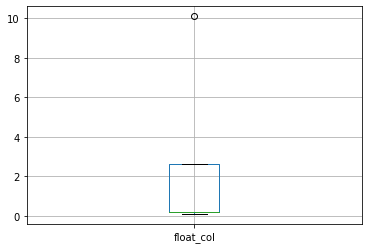

In [37]:
df.boxplot(column='float_col', return_type='axes');

In [38]:
df

,int_col,float_col,str_col
0,1,0.10,a
1,2,0.20,b
2,6,0.20,fill
3,8,10.10,c
4,-1,2.65,a


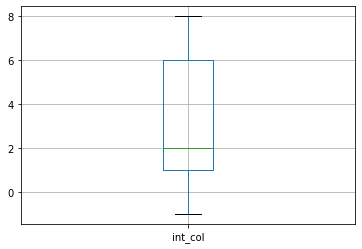

In [39]:
df.boxplot(column='int_col', return_type='axes');


## Merge and Join

Pandas supports database-like joins which makes it easy to link data frames.

 * Perform inner, outer, left and right joins of the dataframe with the second dataframe defined below, using the common key 'str_col' as key

In [40]:
df2 = pd.DataFrame({'str_col' : ['a','b'], 'int_col_2' : [1, 2]})
df2

,str_col,int_col_2
0,a,1
1,b,2


In [41]:
df

,int_col,float_col,str_col
0,1,0.10,a
1,2,0.20,b
2,6,0.20,fill
3,8,10.10,c
4,-1,2.65,a


In [42]:
pd.merge(df, df2, on='str_col', how='inner')

,int_col,float_col,str_col,int_col_2
0,1,0.10,a,1
1,-1,2.65,a,1
2,2,0.20,b,2


In [43]:
pd.merge(df2, df, on='str_col', how='inner')

,str_col,int_col_2,int_col,float_col
0,a,1,1,0.10
1,a,1,-1,2.65
2,b,2,2,0.20


In [44]:
pd.merge(df, df2, on='str_col', how='outer')

,int_col,float_col,str_col,int_col_2
0,1,0.10,a,1.0
1,-1,2.65,a,1.0
2,2,0.20,b,2.0
3,6,0.20,fill,NaN
4,8,10.10,c,NaN


In [45]:
pd.merge(df2, df, on='str_col', how='outer')

,str_col,int_col_2,int_col,float_col
0,a,1.0,1,0.10
1,a,1.0,-1,2.65
2,b,2.0,2,0.20
3,fill,NaN,6,0.20
4,c,NaN,8,10.10


In [46]:
pd.merge(df, df2, on='str_col', how='left')

,int_col,float_col,str_col,int_col_2
0,1,0.10,a,1.0
1,2,0.20,b,2.0
2,6,0.20,fill,NaN
3,8,10.10,c,NaN
4,-1,2.65,a,1.0


In [47]:
pd.merge(df, df2, on='str_col', how='right')

,int_col,float_col,str_col,int_col_2
0,1,0.10,a,1
1,-1,2.65,a,1
2,2,0.20,b,2


## Plot

Pandas is equiped with straightforward wrappers for quick plotting of data

 * Use plot to visualize the columns of the dataframe defined below
 * Use hist to visualize the distribution of the data in the form of a histogram

In [85]:
plot_df = pd.DataFrame(np.random.randn(1000,2),columns=['x','y'])
plot_df['y'] = plot_df['y'].map(lambda x : x + 1)
plot_df.head()

,x,y
0,-0.531813,-0.241173
1,0.315847,3.411111
2,0.027006,0.261425
3,0.802505,1.666169
4,-0.950810,0.517906


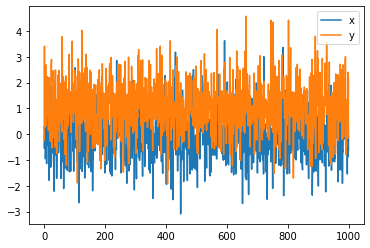

In [87]:
plot_df.plot()

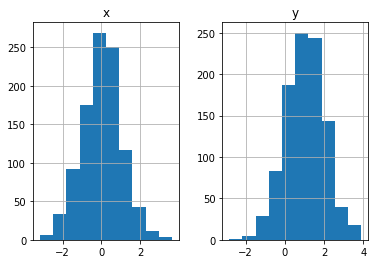

In [50]:
plot_df.hist();

# Exercise

In [91]:
# create DataFrame
df = pd.DataFrame([(0.0,  1.0, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, 4.0),
                   (2.0, 3.0, -3.0, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))
df

,a,b,c,d
0,0.0,1.0,-1.0,1.0
1,NaN,2.0,NaN,4.0
2,2.0,3.0,-3.0,9.0
3,NaN,4.0,-4.0,16.0


In [88]:
# drop rows that have any missing value
df.dropna()

,int_col,float_col,str_col
0,1,0.1,a
1,2,0.2,b
3,8,10.1,c


In [89]:
# drop columns that have any missing value
df.dropna(axis=1)

,int_col
0,1
1,2
2,6
3,8
4,-1


In [90]:
# fill missing data with zeros
df.fillna(0)

,int_col,float_col,str_col
0,1,0.1,a
1,2,0.2,b
2,6,0.2,0
3,8,10.1,c
4,-1,0.0,a


In [92]:
# fill missing data in column a with 10 and in the other columns with 5
df.fillna({"a":10, "c":5})


,a,b,c,d
0,0.0,1.0,-1.0,1.0
1,10.0,2.0,5.0,4.0
2,2.0,3.0,-3.0,9.0
3,10.0,4.0,-4.0,16.0
